In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [3]:
# 파이썬 구문 사용
x = tf.zeros([10, 10])
x += 2  # 이것은 x = x + 2와 같으며, x의 초기값을 변경하지 않습니다.
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [4]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# 값을 재배열합니다.
v.assign(3.0)
assert v.numpy() == 3.0

# tf.square()와 같은 텐서플로 연산에 `v`를 사용하고 재할당합니다. 
v.assign(tf.square(v))
assert v.numpy() == 9.0

In [5]:
class Model(object):
  def __init__(self):
    # 변수를 (5.0, 0.0)으로 초기화 합니다.
    # 실제로는 임의의 값으로 초기화 되어야합니다.
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

In [6]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [7]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [8]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('현재 손실: '),
print(loss(model(inputs), outputs).numpy())

<Figure size 640x480 with 1 Axes>

현재 손실: 
9.649714


In [9]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

에포크  0: W=5.00 b=0.00, 손실=9.64971
에포크  1: W=4.57 b=0.44, 손실=6.25650
에포크  2: W=4.23 b=0.78, 손실=4.19015
에포크  3: W=3.97 b=1.05, 손실=2.93178
에포크  4: W=3.76 b=1.26, 손실=2.16543
에포크  5: W=3.60 b=1.43, 손실=1.69871
에포크  6: W=3.48 b=1.56, 손실=1.41446
에포크  7: W=3.38 b=1.66, 손실=1.24134
에포크  8: W=3.31 b=1.74, 손실=1.13588
에포크  9: W=3.25 b=1.80, 손실=1.07165


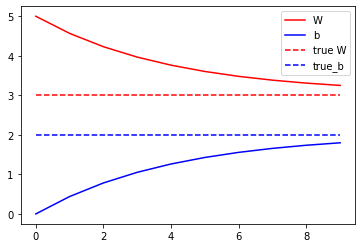

In [10]:
model = Model()

# 도식화를 위해 W값과 b값의 변화를 저장합니다.
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('에포크 %2d: W=%1.2f b=%1.2f, 손실=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# 저장된 값들을 도식화합니다.
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()